In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import skimage.io as io
import cv2

In [2]:
# Directories containing images
dataDir = 'images'
annDir = 'val'
fileLabel = 'ILSVRC2012_devkit_t12/data/ILSVRC2012_validation_ground_truth.txt'
fileLabelNames = 'labelNames.txt'
fileImageNetNames = 'ImageNetLabels.txt'

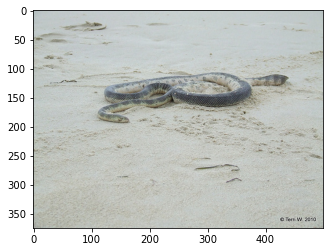

In [3]:
fileName = 'ILSVRC2012_val_00000001.JPEG'
I = io.imread( '%s/%s'%(dataDir,fileName) )
plt.imshow(I)
plt.show()

In [4]:
IMG_SIZE = [ 227, 227 ]
image = I
image = tf.image.resize( image, IMG_SIZE )
image /= 255

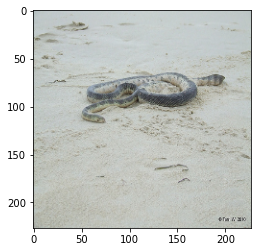

In [5]:
plt.imshow(image)
plt.show()

In [44]:
def gaussianPyramid( image, sig_o ):

    pyramid = [ image ]
    while tf.shape( image )[0] > 1:

        image = applyGauss( image, sig_o )
        pyramid.append( tf.image.resize( image, IMG_SIZE ) )    # Resize image to size of original

    return pyramid

def applyGauss( image, sig ):

    # Apply Gaussian blur
    ksize = (0,0)   # Kernel size is computed from sig values
    sigX = sig
    sigY = 0        # sigY uses sigX
    image = cv2.GaussianBlur( image.numpy(), ksize, sigX, sigY )

    # Downsample
    height, width, _ = tf.shape( image )
    newHeight = tf.math.floor( height/2 )
    newWidth = tf.math.floor( width/2 )
    image = tf.image.resize( image, [ newHeight, newWidth ] )

    return image


def laplacianPyramid( gaussPyramid ):

    pyramid = []

    # Calculate the difference between each layer
    for i in range( len(gaussPyramid)-1 ): 
        pyramid.append( abs(gaussPyramid[i] - gaussPyramid[i+1]) )
    
    # Append the last layer to the top of the pyramid
    pyramid.append( gaussPyramid[-1] )  

    return pyramid

Gauss: 8
Laplace: 8


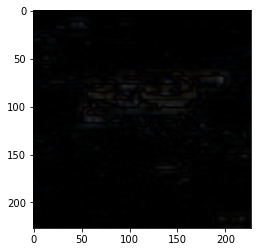

In [47]:
# Reset image
IMG_SIZE = [ 227, 227 ]
image = I
image = tf.image.resize( image, IMG_SIZE )
image /= 255

# Test blurring
gaussPyramid = gaussianPyramid( image, 0.5 )

print( "Gauss:", len( gaussPyramid ) )

# Test Laplacian
pyramid = laplacianPyramid( gaussPyramid )
print( "Laplace:", len(pyramid) )
plt.imshow( pyramid[2] )
plt.show()